## Casting Defects Classification

**Importing Dependencies**

In [1]:
import os
import tensorflow as tf
import tensorflow_hub as tf_hub
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
img_height = 300
img_width = 300
classes = ['defective','ok']

**Importing the dataset**

In [10]:
trainset = tf.keras.preprocessing.image_dataset_from_directory(
        'archive/casting_data/casting_data/train/',
        batch_size = 32,
        image_size = (img_height,img_width),
        color_mode = 'grayscale',
        shuffle = True,
        seed = 123,
        validation_split = 0.1,
        subset = 'training'      
)

validationset = tf.keras.preprocessing.image_dataset_from_directory(
        'archive/casting_data/casting_data/train/',
        batch_size = 32,
        image_size = (img_height,img_width),
        color_mode = 'grayscale',
        shuffle = True,
        seed = 123,
        validation_split = 0.1,
        subset = 'validation'      
)

Found 6633 files belonging to 2 classes.
Using 5970 files for training.
Found 6633 files belonging to 2 classes.
Using 663 files for validation.


**Visualization** 

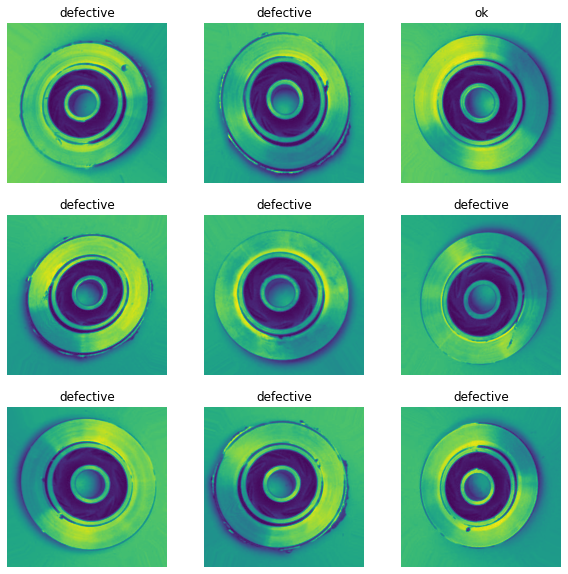

In [39]:
import matplotlib.pyplot as plt
class_names = ['defective','ok']
plt.figure(figsize=(10, 10))
for images, labels in trainset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

**Preprocessing**

In [40]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
trainset = trainset.map(lambda x, y: (normalization_layer(x), y))
validationset = validationset.map(lambda x, y: (normalization_layer(x), y))

In [41]:
trainset = trainset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
validationset = validationset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

**Building the Model**

In [42]:
img_size = (300,300)
cnn = models.Sequential([ 
    Conv2D(32, 3, activation='relu', padding='same', strides=2,input_shape=img_size+(1,)),
    MaxPooling2D(pool_size=2, strides=2),
    Conv2D(64, 3, activation='relu', padding='same', strides=2),
    MaxPooling2D(pool_size=2, strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  
])

In [34]:
img_size+(1,)

(300, 300, 1)

In [43]:
cnn.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

**Training**

In [44]:
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model.h5',
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,verbose=1)
]

history = cnn.fit(trainset,
                    batch_size=64,
                    epochs=30,
                    callbacks = callbacks_list,
                    verbose=1,
                    validation_data=validationset)

Epoch 1/30
187/187 [==============================] - ETA: 0s - loss: 0.6054 - accuracy: 0.6712 ETA: 0s - loss: 0.6107 - accuracy
Epoch 00001: val_loss improved from inf to 0.43496, saving model to model.h5
187/187 [==============================] - 13s 62ms/step - loss: 0.6054 - accuracy: 0.6712 - val_loss: 0.4350 - val_accuracy: 0.8145
Epoch 2/30
187/187 [==============================] - ETA: 0s - loss: 0.3397 - accuracy: 0.8514 ETA: 4s - loss: 0.4278 - accuracy
Epoch 00002: val_loss improved from 0.43496 to 0.23019, saving model to model.h5
187/187 [==============================] - 6s 34ms/step - loss: 0.3397 - accuracy: 0.8514 - val_loss: 0.2302 - val_accuracy: 0.9231
Epoch 3/30
187/187 [==============================] - ETA: 0s - loss: 0.1845 - accuracy: 0.9343
Epoch 00003: val_loss improved from 0.23019 to 0.14883, saving model to model.h5
187/187 [==============================] - 6s 34ms/step - loss: 0.1845 - accuracy: 0.9343 - val_loss: 0.1488 - val_accuracy: 0.9487
Epoch 4/

Epoch 24/30
187/187 [==============================] - ETA: 0s - loss: 0.0149 - accuracy: 0.9948 ETA: 0s - loss: 0.0156 - accuracy - ETA: 0s - loss: 0.0149 - accuracy: 0.99
Epoch 00024: val_loss did not improve from 0.01031
187/187 [==============================] - 6s 34ms/step - loss: 0.0149 - accuracy: 0.9948 - val_loss: 0.0106 - val_accuracy: 0.9955
Epoch 25/30
187/187 [==============================] - ETA: 0s - loss: 0.0071 - accuracy: 0.9982 ETA: 1s - - ETA: 0s - loss: 0
Epoch 00025: val_loss did not improve from 0.01031
187/187 [==============================] - 6s 34ms/step - loss: 0.0071 - accuracy: 0.9982 - val_loss: 0.0143 - val_accuracy: 0.9955
Epoch 26/30
185/187 [============================>.] - ETA: 0s - loss: 0.0052 - accuracy: 0.9986
Epoch 00026: val_loss improved from 0.01031 to 0.01003, saving model to model.h5
187/187 [==============================] - 6s 34ms/step - loss: 0.0052 - accuracy: 0.9987 - val_loss: 0.0100 - val_accuracy: 0.9970
Epoch 27/30
187/187 [===

**Testing and Evaluation**

In [47]:
img_size = (300, 300)
batch_size = 64
arg_test = {'target_size': img_size,
            'class_mode': 'binary',
            'color_mode': 'grayscale',
            'batch_size': batch_size,
            'shuffle': False}

In [48]:
test_idg = ImageDataGenerator(rescale=1./255)

In [49]:
test  = test_idg.flow_from_directory(directory='archive/casting_data/casting_data/test', **arg_test)

Found 715 images belonging to 2 classes.


In [50]:
test.image_shape

(300, 300, 1)

In [51]:
y_pred = cnn.predict(test)


In [52]:
y_pred[:10]

array([[9.0742965e-08],
       [5.0812462e-12],
       [4.2570140e-12],
       [5.2697863e-10],
       [4.6203946e-21],
       [3.1121014e-18],
       [3.1516340e-06],
       [1.1695511e-02],
       [2.2664871e-12],
       [2.2228709e-05]], dtype=float32)

In [53]:
y_pred_idx = (y_pred >= 0.5).reshape(-1,)
y_pred_idx

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [54]:
y_actual = test.classes[test.index_array]

In [55]:
y_actual[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [56]:
score = cnn.evaluate(test,verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0037884614430367947
Test accuracy: 0.9986013770103455


**Confusion Matrix**

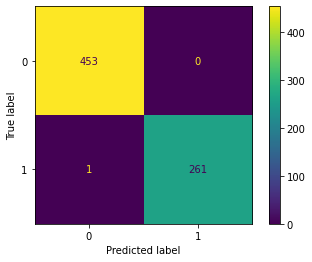

In [57]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_actual, y_pred_idx)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# **Loading the Saved Model**

In [4]:
cnn = keras.models.load_model('model.h5')

In [ ]:
"C://Users//user//Documents//Untrodden Labs//archive//casting_512x512//casting_512x512//ok_front//cast_ok_0_601.jpeg"

## Testing on Images

In [11]:
import cv2
img_size = (300, 300)
img = keras.preprocessing.image.load_img(
    "C://Users//user//Documents//Untrodden Labs//archive//casting_512x512//casting_512x512//def_front//cast_def_0_122.jpeg",
    target_size=img_size)

img = tf.image.rgb_to_grayscale(img)
img /= 255
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create batch axis
print(img_array.shape)
predictions = cnn.predict(img_array)
print(predictions)
score = predictions[0]
print(score)

print(
    "This image is %.2f percent defective and %.2f percent OK."
    % (100 * (1 - score), 100 * score)
)

(1, 300, 300, 1)
[[2.338111e-07]]
[2.338111e-07]
This image is 100.00 percent defective and 0.00 percent OK.


## Live Webcam Predictions - Manually Capturing Images

In [12]:
img_size = (300, 300)
import cv2
frameWidth= 640         # CAMERA RESOLUTION
frameHeight = 480
brightness = 180
cap = cv2.VideoCapture(0) 

cap.set(3, frameWidth)
cap.set(4, frameHeight)
cap.set(10, brightness)
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
#     gray = cv2.cvtColor(frame, cv2.COLOR)
    

    # Display the resulting frame
    cv2.imshow('frame',frame)
    key = cv2.waitKey(1)
    
    if key == ord('s'): 
        cv2.imwrite(filename='saved_img.jpg', img=frame)
        img = keras.preprocessing.image.load_img("saved_img.jpg", target_size=img_size)
        img = tf.image.rgb_to_grayscale(img)
        img /= 255
        img_array = keras.preprocessing.image.img_to_array(img)
        img_array = tf.expand_dims(img_array, 0) # Create batch axis

        predictions = cnn.predict(img_array)
        print(predictions)
        score = predictions[0]
        print(score)

        print(
            "This image is %.2f percent defective and %.2f percent OK."
            % (100 * (1 - score), 100 * score)
        )
        
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()



[[0.9531814]]
[0.9531814]
This image is 4.68 percent defective and 95.32 percent OK.
[[0.04307348]]
[0.04307348]
This image is 95.69 percent defective and 4.31 percent OK.
[[0.9997857]]
[0.9997857]
This image is 0.02 percent defective and 99.98 percent OK.
[[0.26802954]]
[0.26802954]
This image is 73.20 percent defective and 26.80 percent OK.
[[2.0244392e-05]]
[2.0244392e-05]
This image is 100.00 percent defective and 0.00 percent OK.
[[0.00660116]]
[0.00660116]
This image is 99.34 percent defective and 0.66 percent OK.
[[0.99999976]]
[0.99999976]
This image is 0.00 percent defective and 100.00 percent OK.
[[0.9999999]]
[0.9999999]
This image is 0.00 percent defective and 100.00 percent OK.
[[1.]]
[1.]
This image is 0.00 percent defective and 100.00 percent OK.
[[1.]]
[1.]
This image is 0.00 percent defective and 100.00 percent OK.


## Realtime Predictions on Webcam

In [16]:
img_size = (300, 300)
import cv2
import numpy as np
font = cv2.FONT_HERSHEY_SIMPLEX

frameWidth= 640         # CAMERA RESOLUTION
frameHeight = 480
brightness = 180
cap = cv2.VideoCapture(0) 

cap.set(3, frameWidth)
cap.set(4, frameHeight)
cap.set(10, brightness)
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
#     gray = cv2.cvtColor(frame, cv2.COLOR)
    

    # Display the resulting frame
#     cv2.imshow('frame',frame)
#     key = cv2.waitKey(1)
    
    img = cv2.resize(frame, (300, 300))
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = np.asarray(img, dtype=np.float64)
    img = img.reshape(1,300, 300, 1)
    img /= 255

    predictions = cnn.predict(img)
#     print(predictions)
    score = predictions[0]
#     print(score)

#     print(
#         "This image is %.2f percent defective and %.2f percent OK."
#         % (100 * (1 - score), 100 * score)
#     )
#     cv2.putText(frame, "PROBABILITY: ", (20, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)

    cv2.putText(frame,str(100*score)+"% OK "+str(100 * (1 - score))+"% Defective", (20, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)    
    cv2.imshow('frame',frame)
    key = cv2.waitKey(1)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

